In [1]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib
%pip install metis

You should consider upgrading via the '/Users/ananthgoyal/.pyenv/versions/3.8-dev/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/ananthgoyal/.pyenv/versions/3.8-dev/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/ananthgoyal/.pyenv/versions/3.8-dev/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/ananthgoyal/.pyenv/versions/3.8-dev/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/ananthgoyal/.pyenv/versions/3.8-dev/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# The starter code is short and simple, take a look!
from starter import *
from networkx.algorithms import community
import copy
import metis
import itertools

/Users/ananthgoyal/.pyenv/versions/3.8-dev/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Phase 1 - Create Inputs

In [3]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

def small(G: nx.Graph):
    # TODO add edges to complete the small input
    for i in range(50):
        for j in range(50, 100):
            G.add_edge(i, j, weight = 250)
    
def medium(G: nx.Graph):
    # TODO add edges to complete the medium input
    # 3 teams
    for i in range(100):
        for j in range(100, 300, 4):
            G.add_edge(i, j, weight = 100)
    for i in range(100, 200):
        for j in range(200, 300, 4):
            G.add_edge(i, j, weight = 100) 
    
def large(G: nx.Graph):
    # TODO add edges to complete the large input
    gap = 100
    for i in range(250):
        for j in range (250, 1000, gap):
            G.add_edge(i, j, weight = 200)
    for i in range(250, 500):
        for j in range (500, 1000, gap):
            G.add_edge(i, j, weight = 200)
    for i in range(500, 750):
        for j in range (750, 1000, gap):
            G.add_edge(i, j, weight = 200)
  

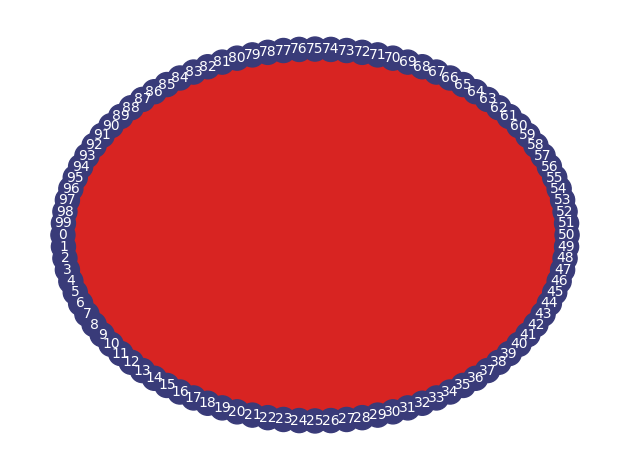

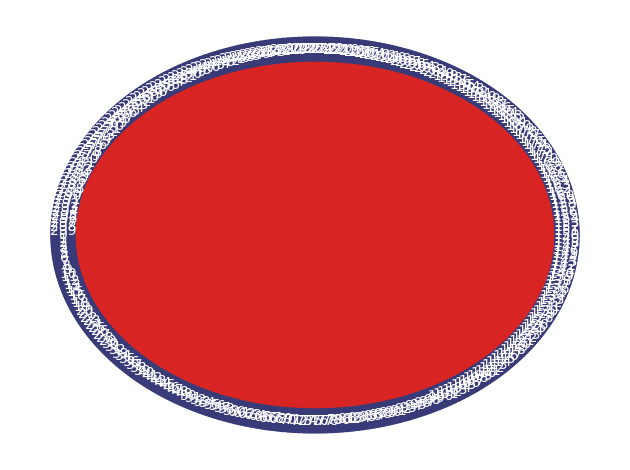

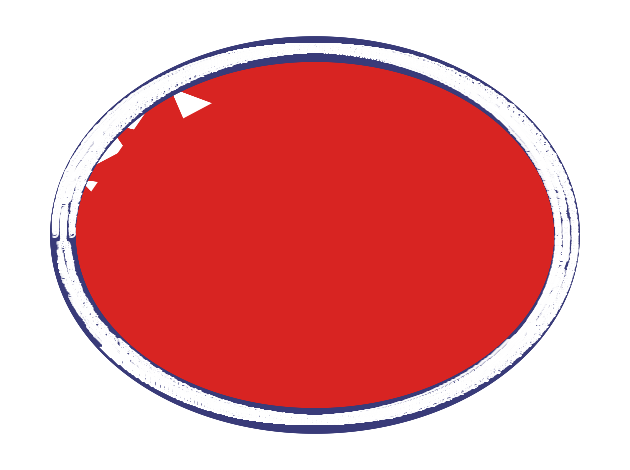

In [4]:
G = nx.empty_graph(N_SMALL)
small(G)
write_input(G, 'small.in', overwrite=True)
visualize(G)


G = nx.empty_graph(N_MEDIUM)
medium(G)
write_input(G, 'medium.in', overwrite=True)
visualize(G)


G = nx.empty_graph(N_LARGE)
large(G)
write_input(G, 'large.in', overwrite=True)
visualize(G)

# Phase 2 - Implement your Solver

In [5]:
def part(G:nx.Graph, cuts = 3):
    G_prime = copy.deepcopy(G)
    G_prime.graph['edge_weight_attr'] = 'weight'
    num_nodes = G_prime.number_of_nodes()

    for i in range(num_nodes):
        for j in range(i, num_nodes):
            if not G_prime.has_edge(i, j):
                G_prime.add_edge(i, j, weight = 1000)
            else:
                G_prime.add_edge(i, j, weight = 1000 - (G_prime[i][j]['weight']))
    scoreSet = []
    partSet = []
    for _ in range(1):
        val, parts = metis.part_graph(G_prime, cuts, tpwgts=None, ubvec=None, recursive=False, ncuts = 1000, niter = 1000)


        for i in range(len(parts)):
            G.nodes[i]['team'] = parts[i] + 1
        scr = score(G)
        scoreSet.append(scr)
        partSet.append(parts)
        print(scr)
        #return G
    
    minIND = scoreSet.index(min(scoreSet))
    for i in range(len(partSet[minIND])):
        G.nodes[i]['team'] = partSet[minIND][i] + 1
    return partSet[minIND], min(scoreSet)

def solve2(G: nx.Graph):
    partSet = []
    scoreSet = []
    for i in range(2, 8):
        pS, sS = part(G, cuts=i)
        partSet.append(pS)
        scoreSet.append(sS)
    minIND =  scoreSet.index(min(scoreSet))
    for i in range(len(partSet[minIND])):
        G.nodes[i]['team'] = partSet[minIND][i] + 1
    return G


def solve(G: nx.Graph):
    # TODO implement this function with your solver
    # Assign a team to v with G.nodes[v]['team'] = team_id
    # Access the team of v with team_id = G.nodes[v]['team']
    '''for i in range(50):
        G.nodes[i]['team'] = 1
    for i in range(50, 100):
        G.nodes[i]['team'] = 2'''
    G_prime = copy.deepcopy(G)
    num_nodes = G_prime.number_of_nodes()
    #maxWeight = list(max(dict(G.edges()).items(), key=lambda x: x[1]['weight'])[1].items())[0][1]
    #print(maxWeight)
    for i in range(num_nodes):
        for j in range(i, num_nodes):
            if not G_prime.has_edge(i, j):
                G_prime.add_edge(i, j, weight = 1001)
            else:
                G_prime.add_edge(i, j, weight = 1000/(G_prime[i][j]['weight']))

    
    for i in list(G.nodes):
        G.nodes[i]['team'] = 1
    score_one_way  = score(G)          
    
    #greedy_two_way = nx.algorithms.community.kernighan_lin_bisection(G_prime, partition=None, max_iter=10, weight='weight', seed=None)
    greedy_two = []
    firstIters = 3
    for i in range(firstIters):
        greedy_two.append(nx.algorithms.community.greedy_modularity_communities(G_prime, weight='weight', resolution=1, cutoff=2, best_n=2))
    #greedy_two_way = nx.algorithms.community.greedy_modularity_communities(G_prime, weight='weight', resolution=1, cutoff=2, best_n=2)
    score_two_way = math.inf
    set_two_way = [[[] for _ in range(2)] for _ in range(firstIters)]
    for x in range(firstIters):
        for i in range(2):
            for j in greedy_two[x][i]:
                #G_prime.nodes[j]['team'] = i + 1
                G.nodes[j]['team'] = i + 1
                set_two_way[x][i].append(j)
        scr = score(G)
        if scr < score_two_way:
            score_two_way = scr
            best_two = set_two_way[x]
            bestX = x
    print(score_two_way)
    G_4_1 = copy.deepcopy(G_prime)
    G_4_1.remove_nodes_from(best_two[1])
    G_4_2 = copy.deepcopy(G_prime)
    G_4_2.remove_nodes_from(best_two[0])
    set_four_way = [[] for _ in range(4)]
    greedy_four_one = nx.algorithms.community.greedy_modularity_communities(G_4_1, weight='weight', resolution=1, cutoff=2, best_n=2)
    #greedy_four_one = nx.algorithms.community.kernighan_lin_bisection(G_4_1, partition=None, max_iter=10, weight='weight', seed=None)
    greedy_four_two = nx.algorithms.community.greedy_modularity_communities(G_4_2, weight='weight', resolution=1, cutoff=2, best_n=2)
    #greedy_four_two = nx.algorithms.community.kernighan_lin_bisection(G_4_2, partition=None, max_iter=10, weight='weight', seed=None)
    for i in range(2):
        for j in greedy_four_one[i]:
            G_4_1.nodes[j]['team'] = i + 1
            G.nodes[j]['team'] = i + 1
            set_four_way[i].append(j)
    for i in range(2):
        for j in greedy_four_two[i]:
            G_4_2.nodes[j]['team'] = i + 3
            G.nodes[j]['team'] = i + 3
            set_four_way[i + 2].append(j)
    #print(score(G_prime))
    nx.algorithms.community.greedy_modularity_communities(G_4_1, weight='weight', resolution=1, cutoff=3, best_n=3, objtype='vol')
    score_four_way = score(G)
    best = min(score_two_way, score_one_way, score_four_way)
    if best == score_one_way:
        for i in list(G.nodes):
            G.nodes[i]['team'] = 1
    elif best == score_two_way:
        for i in range(2):
            for j in greedy_two[bestX][i]:
                G.nodes[j]['team'] = i + 1
    else:
        for i in range(2):
            for j in greedy_four_one[i]:
                G.nodes[j]['team'] = i + 1
        for i in range(2):
            for j in greedy_four_two[i]:
                G.nodes[j]['team'] = i + 3

    groups_2 = [[] for _ in range(2)]
    groups_3 = [[] for _ in range(3)]

    return G
    

In [6]:
'''G = read_input('small.in')
part(G)
validate_output(G)
visualize(G)
score(G)
G = read_input('medium.in')
part(G)
validate_output(G)
visualize(G)
score(G)

G = read_input('inputs_170/large225.in')
part(G)
validate_output(G)
visualize(G)
score(G)
G = read_input('inputs_170/large225.in')
solve(G)
validate_output(G)
visualize(G)
score(G)'''

"G = read_input('small.in')\npart(G)\nvalidate_output(G)\nvisualize(G)\nscore(G)\nG = read_input('medium.in')\npart(G)\nvalidate_output(G)\nvisualize(G)\nscore(G)\n\nG = read_input('inputs_170/large225.in')\npart(G)\nvalidate_output(G)\nvisualize(G)\nscore(G)\nG = read_input('inputs_170/large225.in')\nsolve(G)\nvalidate_output(G)\nvisualize(G)\nscore(G)"

In [7]:
#run(solve, 'small.in', 'small.out', overwrite=True)
#run(solve, 'medium.in', 'medium.out', overwrite=True)
#run(solve, 'inputs_170/small1.in', 'medium.out', overwrite=True)
#run(solve, 'inputs_170/large116.in', 'large.out', overwrite=True)
#run(solve2, 'inputs_170/large225.in', 'large.out', overwrite=True)
#run(solve, 'large.in', 'large.out', overwrite=True)
    

In [8]:
run_all(solve2, 'inputs_170', 'outputs_170', overwrite=True)
tar('outputs_170', overwrite=True)

  0%|          | 0/780 [00:00<?, ?it/s]

174671.24281379575
37915.86444563615
3048.5833877950986
1220.5657630471285
2010.7294757362165


  0%|          | 1/780 [01:20<17:31:14, 80.97s/it]

3313.745105172609
inputs_170/large225.in: cost 1220.5657630471285
169032.51928139728
94867.30536840724
52384.90560989307
31048.249396070347
24705.797760513182


  0%|          | 2/780 [01:38<9:28:14, 43.82s/it] 

31206.85383914743
inputs_170/small232.in: cost 24705.797760513182
339276.24281379575
149450.86444563614
741.5833877950985
4220.565763047128
12010.729475736216


  0%|          | 3/780 [02:49<12:03:53, 55.90s/it]

3313.745105172609
inputs_170/large116.in: cost 741.5833877950985
516856.24281379575
342190.86444563617
240901.58338779508
